<a name="top"></a><img src="./source/SpinalHDL.png" alt="SpinalHDL based on Scala" style="width:320px;" />

Before running Spinal HDL code, be sure to load SpinalHDL Libraries  
**Note** : This may be a little slow when the first time load, please wait a moment to download Lib from remote.   

In [ ]:
val path = System.getProperty("user.dir") + "/source/load-spinal.sc"
interp.load.module(ammonite.ops.Path(java.nio.file.FileSystems.getDefault().getPath(path)))

## FixPoint
 **$\color{#FF3030}{Note}$**  this only available on Spinal1.3.7 and higher

###  Safe Adder Extensions 
| operation | description          | return               | state |
|-----------|----------------------|----------------------|-------|
| +^        | add with carry(1 bit expand)           | T(max(x,y) + 1 bits) | new   |
| -^        | sub with carry(1 bit expand)           | T(max(x,y) + 1 bits) | new   |
| +\|         | add with saturation without bit expand | T(max(x,y) bits)     | new   |
| -\|         | sub with saturation without bit expand | T(max(x,y) bits)     | new   |


In [ ]:
class Top extends Component{
    val a, b = UInt(8 bits)
    val c = a + b //return 8 bits without protection, may cause overflow
}
showRtl(new Top)

In [ ]:
class Top extends Component{
    val a, b = UInt(8 bits)
    val c = a +^ b //return 9 bits, adder with carry
}
showRtl(new Top)

In [ ]:
class Top extends Component{
    val a, b = UInt(8 bits)
    val c = a +| b //return 8 bits with saturation
}
showRtl(new Top)

### LowerBit Operation 

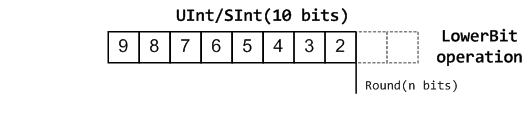

About Rounding: https://en.wikipedia.org/wiki/Rounding

| SpinalHDL-Name | Wikipedia-Name  | API         | Matmatic-Alogrithm     | description | return(align=false)      | Supported |
|----------------|-----------------|-------------|------------------------|-------------|-------------|-----------|
| Ceil           | RoundUp         | ceil        | ceil(x)                |-             | w(x)-n+1 bits | Yes       |
| Floor          | RoundDown       | floor       | floor(x)               |-             | w(x)-n   bits | Yes       |
| FloorToZero    | RoundToZero     | floorToZero | sign\*floor(abs(x))     | -            | w(x)-n   bits | Yes       |
| CeilToInf      | RoundToInf      | ceilToInf   | sign\*ceil(abs(x))      |-             | w(x)-n+1 bits | Yes       |
| RoundUp        | RoundHalfUp     | roundUp     | floor(x+0.5)           | easy        | w(x)-n+1 bits | Yes       |
| RoundDown      | RoundHalfDown   | roundDown   | ceil(x-0.5)            | easy        | w(x)-n+1  bits | Yes       |
| RoundToZero    | RoundHalfToZero | roundToZero | sign\*ceil(abs(x)-0.5)  | -            | w(x)-n+1   bits | Yes       |
| RoundToInf     | RoundHalfToInf  | roundToInf  | sign\*floor(abs(x)+0.5) | common      | w(x)-n+1 bits | Yes       |
| RoundToEven    | RoundHalfToEven | roundToEven |  -                      | -            |   -          | No        |
| RoundToOdd     | RoundHalfToOdd  | roundToOdd  |  -                      | -            |   -          | No        |

the **"RoundToEven, RoundToOdd"** are very special ,Used in some statistical fields with high accuracy concerd, 
SpinalHDL is no support yet. 

RoundType  difference see here: 
https://upload.wikimedia.org/wikipedia/commons/8/8a/comparison_rounding_graphs_smil.svg

You can find **RoundHalfUp, RoundHalfDown, RoundHalfToZero, RoundHalfToInf, RoundHalfToEven, RounHalfToOdd** are very close    
RoundToInf is most common. the api of round in different Programing-language may different.   
In spinal we chose type of RoundToInf as Default RoundType, Api `round = roundToInf` 

In [ ]:
class Top extends Component{
    val a = in SInt(16 bits) //source data is 16 bits                        
    val b = a.ceil(2)        //ceil 2 bits           return 15 bits
    val c = a.floor(2)       //floor 2 bits          return 14 bits
    val d = a.floorToZero(2) //floor 2 bits to zero  return 14 bits
    val e = a.ceilToInf(2)   //ceil 2 bits to Inf    return 15 bits
    val f = a.roundUp(2)     //round 2 bits to +Inf  return 15 bits
    val g = a.roundDown(2)   //round 2 bits to -Inf  return 15 bits
    val h = a.roundToZero(2) //round 2 bits to zero  return 15 bits
    val k = a.roundToInf(2)  //round 2 bits to +-Inf return 15 bits
 }
showRtl(new Top)

**`roundToInf`** is most common    
the api of round in different Programing-language may different.    
In spinal we chose type of RoundToInf as Default RoundType, Api `round = roundToInf` 

| Programing-language | api   | RoundType(spinal) | Example                                                 | comments            |
|---------------------|-------|-------------------|---------------------------------------------------------|---------------------|
| Matlab              | round | RoundToInf        | round(1.5)=2,round(2.5)=3;round(-1.5)=-2,round(-2.5)=-3 | round to ±Infinity  |
| python2             | round | RoundToInf        | round(1.5)=2,round(2.5)=3;round(-1.5)=-2,round(-2.5)=-3 | round to ±Infinity  |
| python3             | round | RoundToEven       | round(1.5)=round(2.5)=2;  round(-1.5)=round(-2.5)=-2    | close to Even       |
| Scala.math          | round | RoundToUp         | round(1.5)=2,round(2.5)=3;round(-1.5)=-1,round(-2.5)=-2 | always to +Infinity |
| SpinalHDL           | round | RoundToInf        | round(1.5)=2,round(2.5)=3;round(-1.5)=-2,round(-2.5)=-3 | round to ±Infinity  |

In [ ]:
class Top extends Component{
    val a = in SInt(16 bits) //source data is 16 bits             
    val k = a.roundToInf(2)  //round 2 bits to +-Inf return 15 bits
 }
showRtl(new Top)

**`roundUp`**  has almost no performance loss than **`roundToInf`**, it is simpler on hardware implement with less area and better timing.

So we strongly recommend **`roundup`** in your work

In [ ]:
class Top extends Component{
    val a = in SInt(16 bits) //source data is 16 bits 
    val f = a.roundUp(2)     //round 2 bits to +Inf  return 15 bits
 }
showRtl(new Top)

### HighBit operation

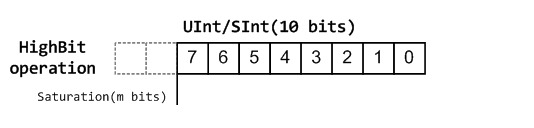

| Operation  | function | Postive-Op                          | Negtive-Op                           | description | supported |
|------------|----------|-------------------------------------|--------------------------------------|-------------|-----------|
| Saturation | sat      | when(Top[w-1,w-n].orR) set maxValue | When(Top[w-1,w-n].andR) set minValue |    -         | Yes       |
| Discard    | trim     | N/A                                 | N/A                                  |   -          | Yes       |
| Symetric   | symetry  | N/A                                 | minValue=>-maxValue                  |   -          | Yes       |


In [ ]:
class Top extends Component{
    val a = in SInt(16 bits) //source data is 16 bits 
    val b = a.sat(8)         //saturation highest 8 bits, return 8 bits 
    val c = b.symmetry        //symetric 8 bits b (-128~128) to (-127 ~ 127), return 8 bits
 }
showRtl(new Top)

**Symetric** is very common in hardware design, because there is no need for bit width expansion and almost no performance loss during inversion
```scala
val a  = in SInt(8 bits)
val b  = SInt(9 bits)
    b := -a //9 bits is safe for inversion 
    
val a1 = a.symetry    //return 8 bits(-128 ~127)
val c  = SInt(8 bits)
    c := -a1 //8 bits is safe (only lose -1 when -128 happen） 
```

`symetric` only for SInt, UInt is no need Symetric

### Factory Function: `fixTo`

two way are provided in UInt/SInt do fixpoint:

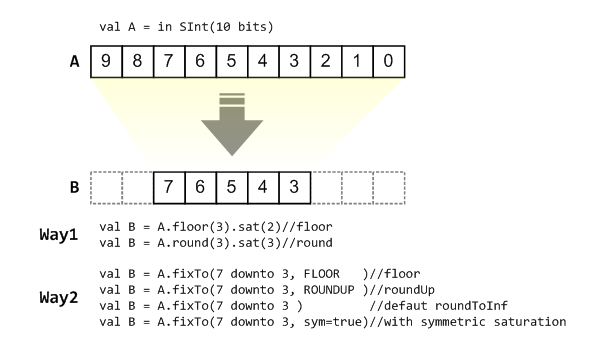

fixTo is strongly recommended in your RTL work, you don\'t need handle   
carry bit align and bit width calculate manually like Way1.

Factory Fix function with Auto Saturation   

| fuction                  | description         | Return            | others |
|--------------------------|---------------------|-------------------|--------|
| fixTo(section,roundType) | Factory FixFunction | section.size bits |        |


In [ ]:
class Top extends Component{
    val A = in SInt(10 bits)  
    val B = A.roundToInf(3).sat(3)
 }
showRtl(new Top)

In [ ]:
class Top extends Component{
    val A = in SInt(10 bits)  
    val B = A.fixTo(7 downto 3) //default RoundToInf, same as A.roundToInf(3).sat(3)
 }
showRtl(new Top)

In [ ]:
class Top extends Component{
    val A = in SInt(10 bits)  
    val B = A.fixTo(7 downto 3, RoundType.ROUNDUP, sym=true) 
 }
showRtl(new Top)